<a href="https://colab.research.google.com/github/ShakeelRaja/hotel_price_prediction/blob/master/hotel_pricing_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
#!pip install fbprophet

Saving data.csv to data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
data = pd.read_csv('data.csv')


In [25]:
data.describe()

,Occupancy,Occupancy_Comp,Occupancy_Kiev,Occupancy_Ukraine,ADR,ADR_Comp,ADR_Kiev,ADR_Ukraine
count,2957.000000,913.000000,930.000000,930.000000,2957.000000,913.000000,930.000000,930.000000
mean,40.466250,50.941292,45.528710,45.590645,53.025336,68.157700,95.298849,96.777032
std,27.593938,18.989494,22.404061,20.985679,28.905947,25.969055,21.789718,21.000569
min,0.000000,5.500000,2.700000,2.700000,0.000000,42.450000,59.560000,58.870000
25%,18.100000,36.200000,27.900000,31.825000,38.630000,61.180000,88.970000,89.420000
50%,34.200000,50.900000,49.850000,50.100000,47.680000,66.360000,94.785000,95.640000
75%,58.900000,64.500000,62.550000,61.275000,62.210000,71.790000,100.252500,101.392500
max,100.000000,97.900000,94.400000,90.300000,578.570000,545.600000,500.650000,455.290000


In [26]:
data.head()

,Date,Occupancy,Occupancy_Comp,Occupancy_Kiev,Occupancy_Ukraine,ADR,ADR_Comp,ADR_Kiev,ADR_Ukraine
0,06/05/2012,0.6,NaN,NaN,NaN,121.91,NaN,NaN,NaN
1,06/06/2012,0.6,NaN,NaN,NaN,135.32,NaN,NaN,NaN
2,06/07/2012,1.9,NaN,NaN,NaN,87.30,NaN,NaN,NaN
3,06/08/2012,3.1,NaN,NaN,NaN,96.19,NaN,NaN,NaN
4,06/09/2012,5.0,NaN,NaN,NaN,130.17,NaN,NaN,NaN


In [29]:
data['Date'] =  pd.to_datetime(data['Date'])#, format='%d%b%Y:%H:%M:%S.%f')
data['ds'] = data['Date']
data.set_index('Date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3034 entries, 2012-06-05 to 2020-09-24
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Occupancy          2957 non-null   float64       
 1   Occupancy_Comp     913 non-null    float64       
 2   Occupancy_Kiev     930 non-null    float64       
 3   Occupancy_Ukraine  930 non-null    float64       
 4   ADR                2957 non-null   float64       
 5   ADR_Comp           913 non-null    float64       
 6   ADR_Kiev           930 non-null    float64       
 7   ADR_Ukraine        930 non-null    float64       
 8   ds                 3034 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 237.0 KB


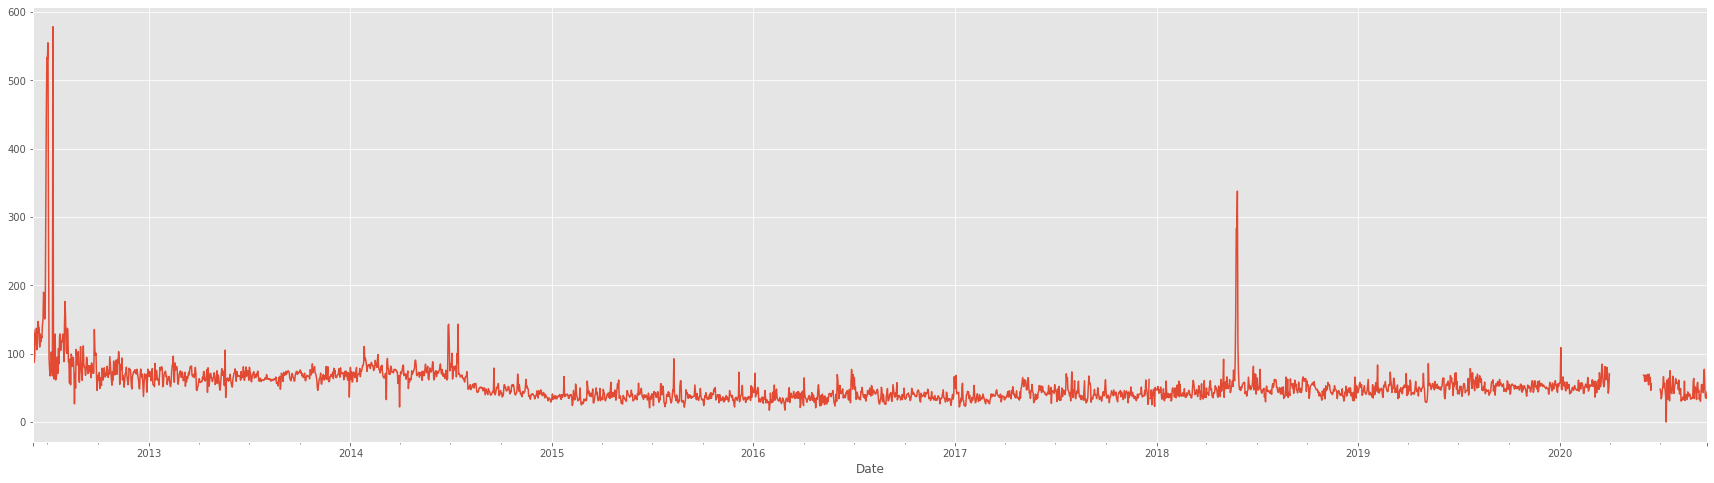

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 8
data.ADR.plot()

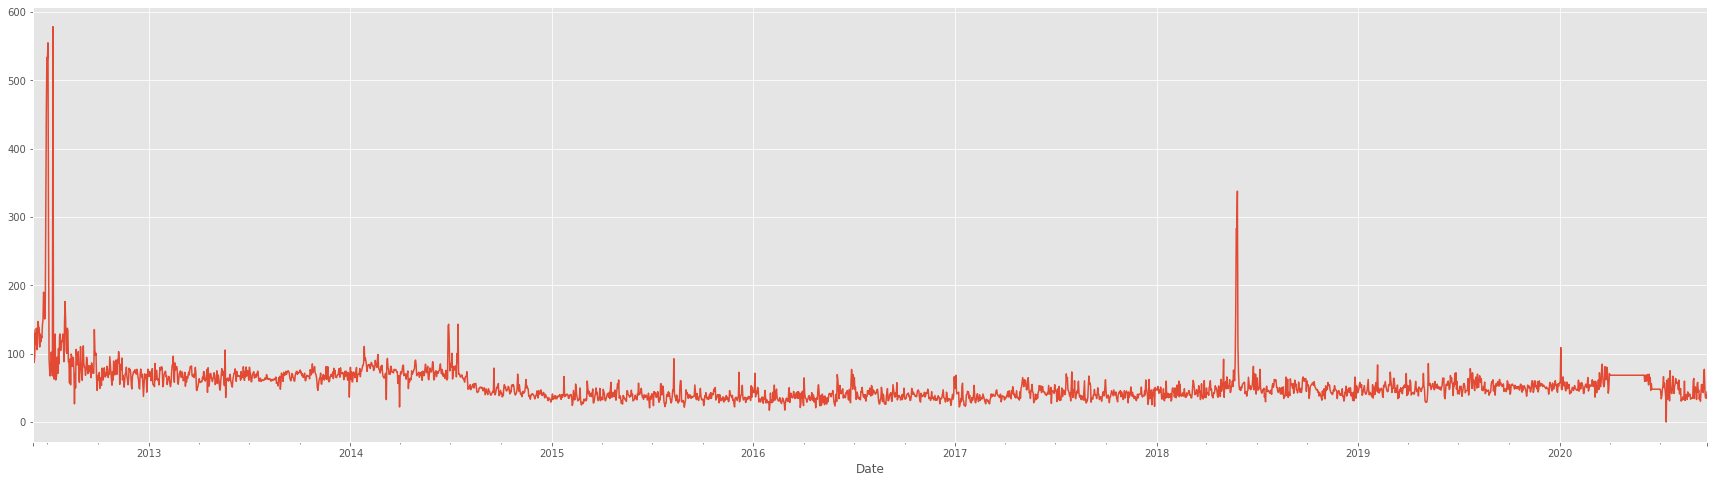

In [31]:
data['y']= data.ADR.bfill()
data.y.plot()

In [33]:
from fbprophet import Prophet
Model = Prophet(interval_width=0.8, daily_seasonality=True)

In [34]:
Model.fit(data)

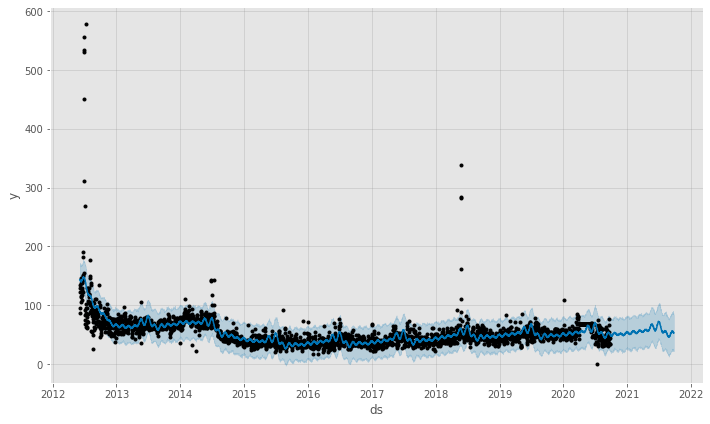

In [35]:
future_dates = Model.make_future_dataframe(periods=365, freq='D')
forecast = Model.predict(future_dates)
Model.plot(forecast, uncertainty=True)
plt.show()

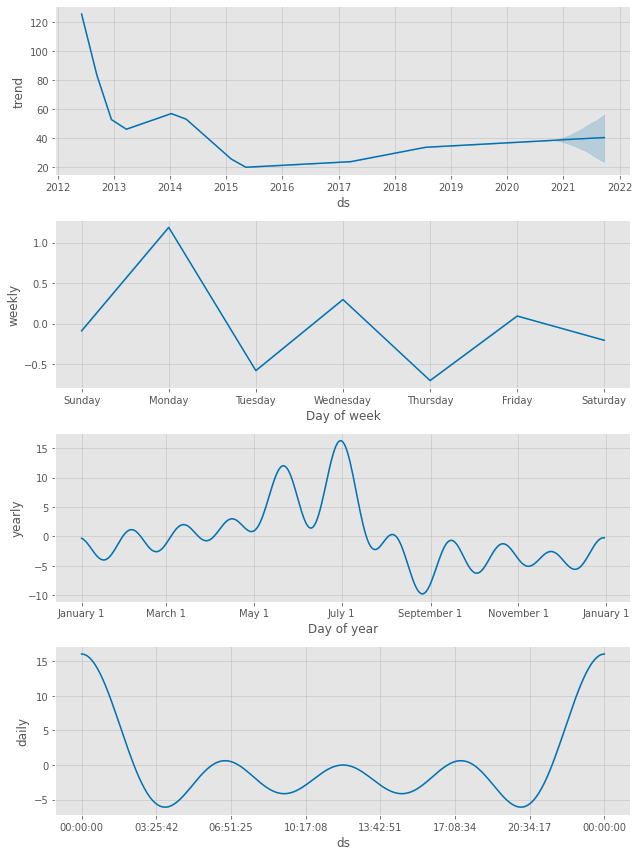

In [38]:
Model.plot_components(forecast)
plt.show()